## Practice: Basic Artificial Neural Networks
Credits: this notebook belongs to [Practical DL](https://docs.google.com/forms/d/e/1FAIpQLScvrVtuwrHSlxWqHnLt1V-_7h2eON_mlRR6MUb3xEe5x9LuoA/viewform?usp=sf_link) course by Yandex School of Data Analysis.

We will start working with neural networks on the practice session. Your homework will be to finish the implementation of the layers.

Our goal is simple, yet an actual implementation may take some time :). We are going to write an Artificial Neural Network (almost) from scratch. The software design was heavily inspired by [PyTorch](http://pytorch.org) which is the main framework of our course 

Speaking about the homework (once again, it will be really similar to this seminar), it requires sending **multiple** files, please do not forget to include all the files when sending to TA. The list of files:
- This notebook
- modules.ipynb with all blocks implemented (except maybe `Conv2d` and `MaxPool2d` layers implementation which are part of 'advanced' version of this homework)

In [1]:
%matplotlib inline
from time import time, sleep
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

# Framework

Implement everything in `modules.ipynb`. Read all the comments thoughtfully to ease the pain. Please try not to change the prototypes.

Do not forget, that each module should return **AND** store `output` and `gradInput`.

The typical assumption is that `module.backward` is always executed after `module.forward`,
so `output` is stored, this would be useful for `SoftMax`. 

### Tech note
Prefer using `np.multiply`, `np.add`, `np.divide`, `np.subtract` instead of `*`,`+`,`/`,`-` for better memory handling.

Example: suppose you allocated a variable 

```
a = np.zeros(...)
```
So, instead of
```
a = b + c  # will be reallocated, GC needed to free
``` 
You can use: 
```
np.add(b,c,out = a) # puts result in `a`
```

In [2]:
# (re-)load layers
%run modules.ipynb

# Toy example

Use this example to debug your code, start with logistic regression and then test other layers. You do not need to change anything here. This code is provided for you to test the layers. Also it is easy to use this code in MNIST task.

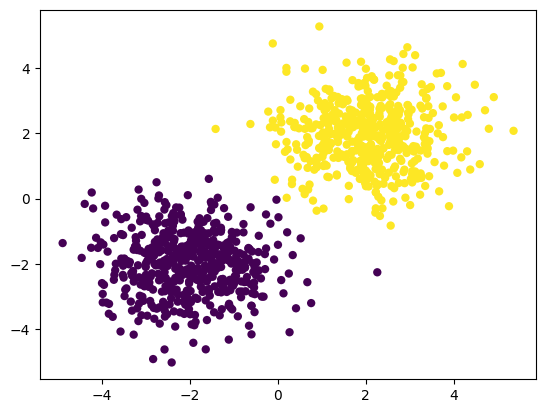

In [3]:
# Generate some data
N = 500

X1 = np.random.randn(N,2) + np.array([2,2])
X2 = np.random.randn(N,2) + np.array([-2,-2])

Y = np.concatenate([np.ones(N),np.zeros(N)])[:,None]
Y = np.hstack([Y, 1-Y])

X = np.vstack([X1,X2])
plt.scatter(X[:,0],X[:,1], c = Y[:,0], edgecolors= 'none')

Define a **logistic regression** for debugging. 

In [4]:
# net = Sequential()
# net.add(Linear(2, 2))
# net.add(LogSoftMax())

criterion = ClassNLLCriterion()

# print(net)

# Test something like that then 

net = Sequential()
net.add(Linear(2, 4))
net.add(ReLU())
net.add(Linear(4, 2))
net.add(LogSoftMax())

print(net)


Linear 2 -> 4
ReLU
Linear 4 -> 2
LogSoftMax



Start with batch_size = 1000 to make sure every step lowers the loss, then try stochastic version.

In [5]:
# Iptimizer params
optimizer_config = {'learning_rate' : 1e-1, 'momentum': 0.9}
optimizer_state = {}

# Looping params
n_epoch = 20
batch_size = 128

In [6]:
# batch generator
def get_batches(dataset, batch_size):
    X, Y = dataset
    n_samples = X.shape[0]
        
    # Shuffle at the start of epoch
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    for start in range(0, n_samples, batch_size):
        end = min(start + batch_size, n_samples)
        
        batch_idx = indices[start:end]
    
        yield X[batch_idx], Y[batch_idx]

### Train

Basic training loop. Examine it.

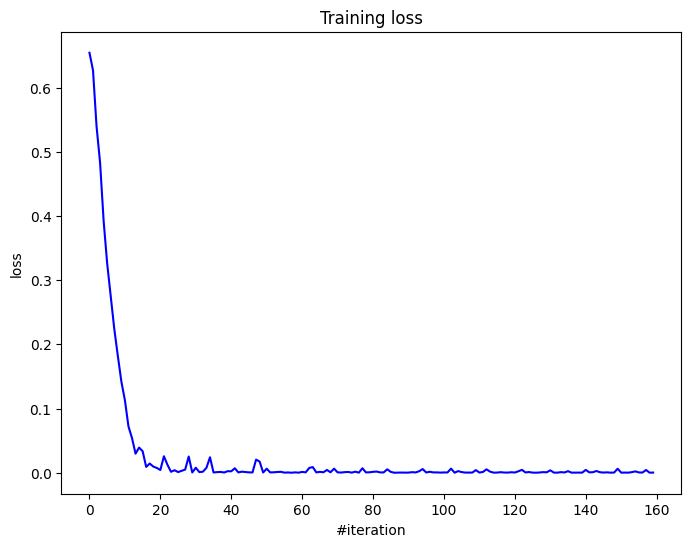

Current loss: 0.000318


In [7]:
loss_history = []

for i in range(n_epoch):
    for x_batch, y_batch in get_batches((X, Y), batch_size):
        
        net.zeroGradParameters()
        
        # Forward
        predictions = net.forward(x_batch)
        loss = criterion.forward(predictions, y_batch)
    
        # Backward
        dp = criterion.backward(predictions, y_batch)
        net.backward(x_batch, dp)
        
        # Update weights
        sgd_momentum(net.getParameters(), 
                     net.getGradParameters(), 
                     optimizer_config,
                     optimizer_state)      
        
        loss_history.append(loss)

    # Visualize
    display.clear_output(wait=True)
    plt.figure(figsize=(8, 6))
        
    plt.title("Training loss")
    plt.xlabel("#iteration")
    plt.ylabel("loss")
    plt.plot(loss_history, 'b')
    plt.show()
    
    print('Current loss: %f' % loss)    

# Digit classification 

We are using old good [MNIST](http://yann.lecun.com/exdb/mnist/) as our dataset. It can be downloaded with the following file.

In [8]:
# !wget https://raw.githubusercontent.com/girafe-ai/ml-course/23f_basic/homeworks/hw08_nn_from_scratch/mnist.py -nc

In [9]:
!curl -L -o train-images-idx3-ubyte.gz  https://raw.githubusercontent.com/fgnt/mnist/master/train-images-idx3-ubyte.gz
!curl -L -o train-labels-idx1-ubyte.gz  https://raw.githubusercontent.com/fgnt/mnist/master/train-labels-idx1-ubyte.gz
!curl -L -o t10k-images-idx3-ubyte.gz   https://raw.githubusercontent.com/fgnt/mnist/master/t10k-images-idx3-ubyte.gz
!curl -L -o t10k-labels-idx1-ubyte.gz   https://raw.githubusercontent.com/fgnt/mnist/master/t10k-labels-idx1-ubyte.gz


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:03 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:04 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:04 --:--:--     0
 10 9680k   10 1040k    0     0   186k      0  0:00:51  0:00:05  0:00:46  232k
 15 9680k   15 1536k    0     0   233k      0  0:00:41  0:00:06  0:00:35  345k
 17 9680k   17 1696k    0     0   222k      0  0:00:43  0:00:07  0:00:36  379k
 18 9680k   18 1808k    0     0   210k      0  0:00:46  0:00:08  0:00:38  406k
 20 9680k   20 1968k    0     0   204k      0  0:00

In [10]:
import mnist
X_train, y_train, X_val, y_val, X_test, y_test = mnist.load_dataset()

One-hot encode the labels first.

In [11]:
# Your code goes here. ################################################

lables = np.unique(y_train)
lables_count = lables.shape[0]
print(lables, lables_count)

def one_hot(y, lables_count=10):
    coding = np.zeros((y.shape[0], lables_count))
    coding[np.arange(y.shape[0]), y] = 1
    return coding
        
y_train = one_hot(y_train, lables_count)
y_val = one_hot(y_val, lables_count)
y_test = one_hot(y_test, lables_count)

    

[0 1 2 3 4 5 6 7 8 9] 10


- **Compare** `ReLU`, `ELU`, `LeakyReLU`, `SoftPlus` activation functions. 
You would better pick the best optimizer params for each of them, but it is overkill for now. Use an architecture of your choice for the comparison.
- **Try** inserting `BatchNormalization` (folowed by `ChannelwiseScaling`) between `Linear` module and activation functions.
- Plot the losses both from activation functions comparison and `BatchNormalization` comparison on one plot. Please find a scale (log?) when the lines are distinguishable, do not forget about naming the axes, the plot should be goodlooking.
- Plot the losses for two networks: one trained by momentum_sgd, another one trained by Adam. Which one performs better?
- Hint: good logloss for MNIST should be around 0.5. 

In [12]:
from functools import wraps
import time

def timeit(label=None):
    def decorator(func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            start = time.perf_counter()
            result = func(*args, **kwargs)
            end = time.perf_counter()

            name = label if label is not None else func.__name__
            print(f"{name} took {end - start:.4f} seconds")
            return result
        return wrapper
    return decorator

In [13]:
# Your code goes here. ################################################

np.random.seed(42)

print(X_train.shape, len(X_train))

def get_net_with(activation, use_norm=False):
    net = Sequential()
    net.add(Flatten())
    net.add(Linear(784, 256))
    if use_norm:
        net.add(BatchNormalization())
        net.add(ChannelwiseScaling(256))
    net.add(activation)
    net.add(Linear(256, 10))
    net.add(LogSoftMax())

    return net

n_epoch = 20

def train(net, opt=sgd_momentum, opt_config=optimizer_config):
    criterion = ClassNLLCriterion()
    optimizer_state = {}
    loss_history = []
    for i in range(n_epoch):
        for x_batch, y_batch in get_batches((X_train, y_train), batch_size):
            
            net.zeroGradParameters()

            # Forward
            predictions = net.forward(x_batch)
            loss = criterion.forward(predictions, y_batch)
        
            # Backward
            dp = criterion.backward(predictions, y_batch)
            net.backward(x_batch, dp)
            
            # Update weights
            opt(net.getParameters(), 
                        net.getGradParameters(), 
                        opt_config,
                        optimizer_state)      
            
            loss_history.append(loss)

    return loss_history
        
        
def train_with(activation, use_norm=False):
    net = get_net_with(activation, use_norm)
    label = str(activation) if not use_norm else f"{activation} with BN"
    timed_train = timeit(label)(train)
    return timed_train(net)
    
activations = [ReLU(), ELU(), LeakyReLU(), SoftPlus()]
losses = [train_with(act) for act in activations]
losses_with_bn = [train_with(act, use_norm=True) for act in activations]

(50000, 28, 28) 50000
ReLU took 41.2765 seconds
ELU took 78.5517 seconds
LeakyReLU took 76.6421 seconds
SoftPlus took 69.2759 seconds
ReLU with BN took 54.1793 seconds
ELU with BN took 54.7009 seconds
LeakyReLU with BN took 55.1891 seconds
SoftPlus with BN took 79.7683 seconds


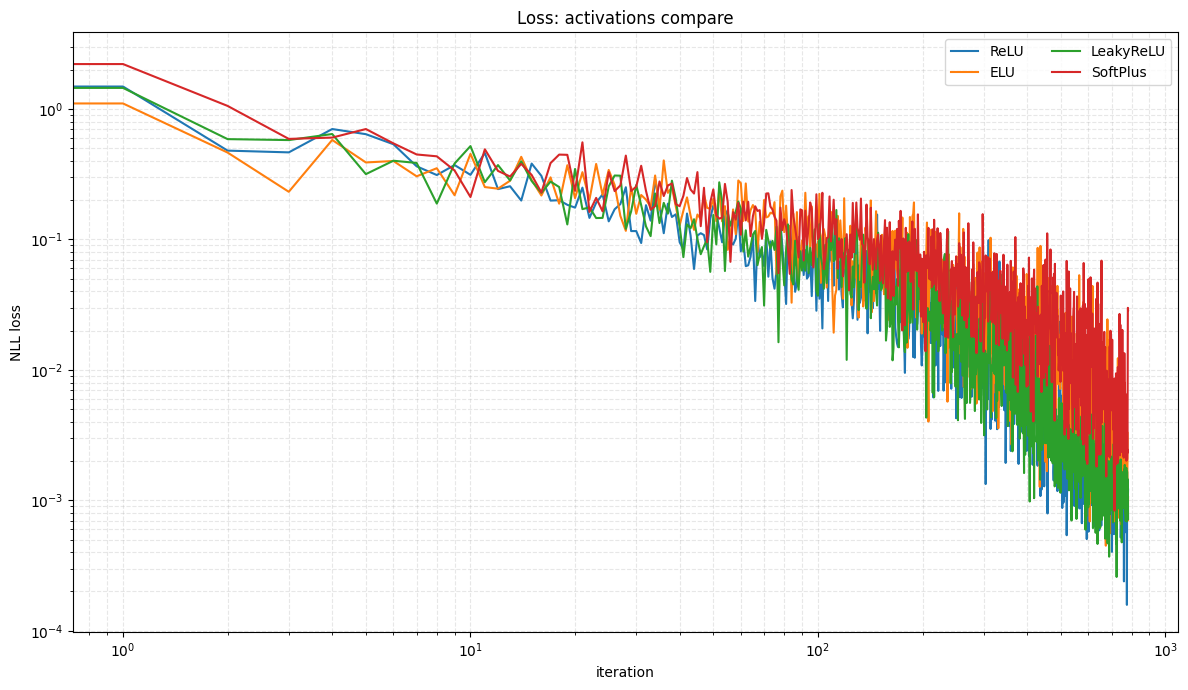

In [31]:
plt.figure(figsize=(12, 7))


freq = 10
for act, loss in zip(activations, losses):
    plt.plot(loss[::freq], label=str(act))

plt.yscale("log")
plt.xscale("log")
plt.xlabel("iteration")
plt.ylabel("NLL loss")
plt.title("Loss: activations compare")
plt.grid(True, which="both", linestyle="--", alpha=0.3)
plt.legend(ncol=2)
plt.tight_layout()
plt.show()

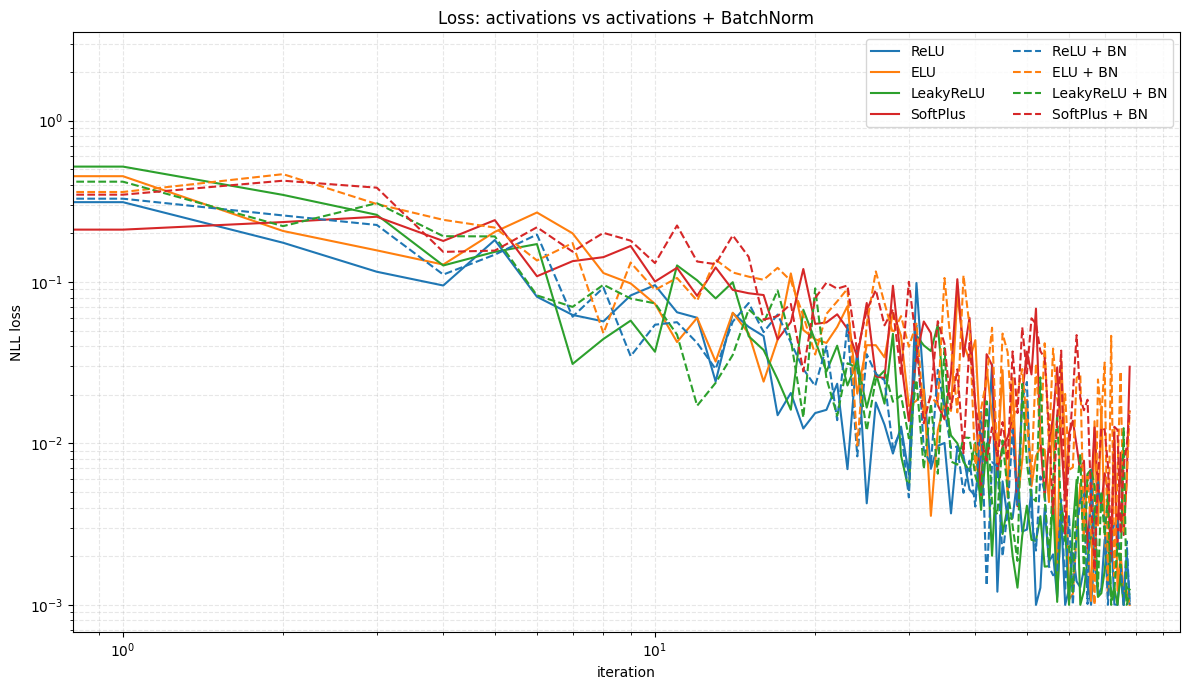

In [29]:
plt.figure(figsize=(12, 7))

freq = 100
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
low_border = 1e-3

i = 0
for act, loss in zip(activations, losses):
    plt.plot(np.maximum(loss[::freq], low_border), label=str(act), color=colors[i])
    i += 1
i = 0
for act, loss_bn in zip(activations, losses_with_bn):
    plt.plot(np.maximum(loss_bn[::freq], low_border), label=f"{act} + BN", linestyle="--", color=colors[i])
    i += 1

plt.yscale("log")
plt.xscale("log")
plt.xlabel("iteration")
plt.ylabel("NLL loss")
plt.title("Loss: activations vs activations + BatchNorm")
plt.grid(True, which="both", linestyle="--", alpha=0.3)
plt.legend(ncol=2)
plt.tight_layout()
plt.show()

In [26]:
for act, loss, loss_bn in zip(activations, losses, losses_with_bn):
    print(f"{act}:  {loss[-1]:.4f}  |  {loss_bn[-1]:.4f}")

ReLU:  0.0011  |  0.0015
ELU:  0.0061  |  0.0136
LeakyReLU:  0.0004  |  0.0041
SoftPlus:  0.0051  |  0.0232


In [16]:
np.random.seed(42)
adam_config = {'learning_rate': 1e-3, 'beta1': 0.9, 'beta2': 0.999, 'epsilon': 1e-8}
relu_norm_net = get_net_with(ReLU(), use_norm=True)
timed_train = timeit("ReLU with Adam")(train)
adam_loss = timed_train(relu_norm_net, opt=adam_optimizer, opt_config=adam_config)

ReLU with Adam took 115.2109 seconds


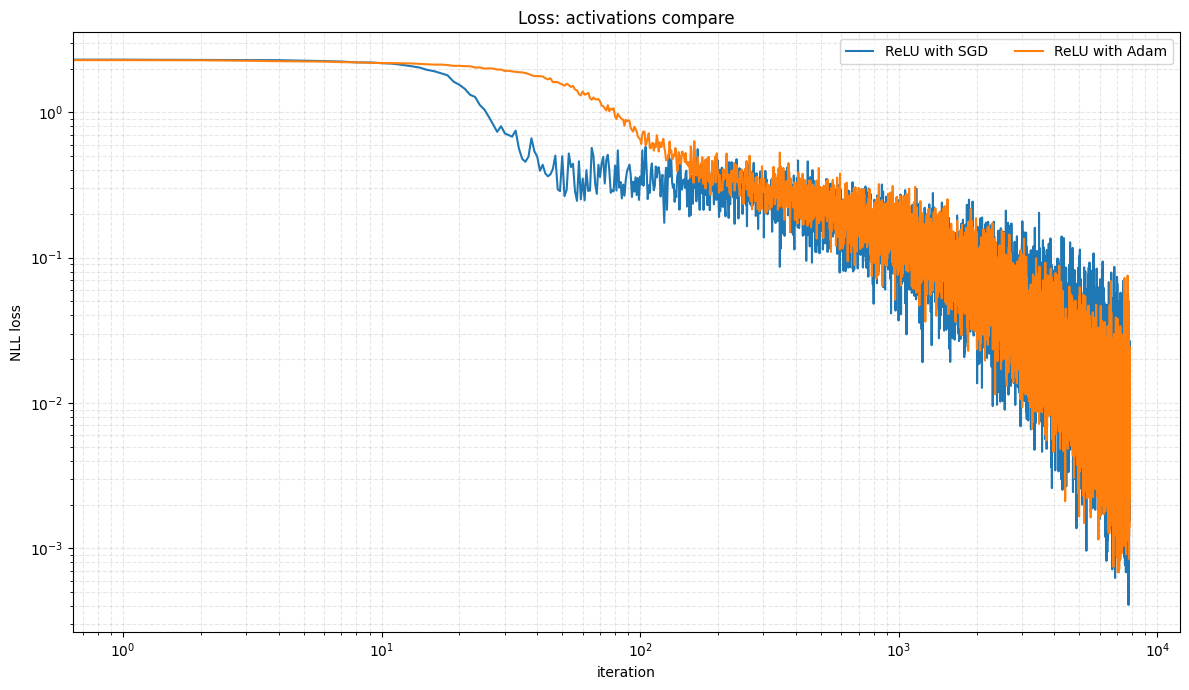

SGD:   0.013638182246309189
Adam:  0.024338371161217197


In [25]:
plt.figure(figsize=(12, 7))

freq = 1

label = "ReLU"
plt.plot(losses_with_bn[1][::freq], label=label + " with SGD")
plt.plot(adam_loss[::freq], label=label + " with Adam")



plt.yscale("log")
plt.xscale("log")
plt.xlabel("iteration")
plt.ylabel("NLL loss")
plt.title("Loss: activations compare")
plt.grid(True, which="both", linestyle="--", alpha=0.3)
plt.legend(ncol=2)
plt.tight_layout()
plt.show()

print("SGD loss:  ", losses_with_bn[1][-1])
print("Adam loss: ", adam_loss[-1])

Write your personal opinion on the activation functions, think about computation times too. Does `BatchNormalization` help?

In [ ]:
# Your answer goes here. ################################################

# ==== time:
# ReLU took 41.2765 seconds
# ELU took 78.5517 seconds
# LeakyReLU took 76.6421 seconds
# SoftPlus took 69.2759 seconds

# ReLU with BN took 54.1793 seconds
# ELU with BN took 54.7009 seconds
# LeakyReLU with BN took 55.1891 seconds
# SoftPlus with BN took 79.7683 seconds

# ReLU with Adam took 115.2109 seconds


# ==== final losses(with bn):
# ReLU:       0.0011  |  0.0015
# ELU:        0.0061  |  0.0136
# LeakyReLU:  0.0004  |  0.0041
# SoftPlus:   0.0051  |  0.0232

# ==== losses by optimizers:
# SGD:   0.013638182246309189
# Adam:  0.024338371161217197


Обучение сети с ReLU без нормализации занимает меньше всего времени, при этом показывает наименьший loss.  
Нормализация ускоряет ELU и LeakyELU при этом увеличивая loss, но не улучшает ни скорость ни loss ReLU и SoftPlus.  
Все варианты сети достаточно быстро достигают ошибки в 10^-1 и начинают "дребезжать" сходясь к 10^-3.  
Использованиe Adam для сети c ReLU увеличило время обучения и loss(но не на порядок)  
При этом спуск у Adam на графике выглядит более плавным и более стабильным, чем у SGD

**Finally**, use all your knowledge to build a super cool model on this dataset. Use **dropout** to prevent overfitting, play with **learning rate decay**. You can use **data augmentation** such as rotations, translations to boost your score. Use your knowledge and imagination to train a model. Don't forget to call `training()` and `evaluate()` methods to set desired behaviour of `BatchNormalization` and `Dropout` layers.

In [32]:
# Your code goes here. ################################################

def get_super_cool_net():
    net = Sequential()
    net.add(Flatten())
    
    net.add(Linear(784, 512))
    net.add(BatchNormalization())
    net.add(ChannelwiseScaling(512))
    net.add(ReLU())
    net.add(Dropout(0.2))
    
    net.add(Linear(512, 256))
    net.add(BatchNormalization())
    net.add(ChannelwiseScaling(256))
    net.add(ReLU())
    net.add(Dropout(0.2))
    
    net.add(Linear(256, 10))
    net.add(LogSoftMax())

    return net

Print here your accuracy on test set. It should be around 90%.

In [33]:
# Your answer goes here. ################################################

n_epoch = 20

def get_accuracy(log_probs, y_onehot):
    y_pred = np.argmax(log_probs, axis=1)
    y_true = np.argmax(y_onehot, axis=1)
    return (y_pred == y_true).mean()

def train_cool_net(net, opt=sgd_momentum, opt_config=optimizer_config, lr_decay=0.5, decay_freq=5):
    criterion = ClassNLLCriterion()
    optimizer_state = {}
    loss_history = []
    val_acc_history = []
    opt_config = dict(opt_config)
        
    for i in range(n_epoch):
        net.train()
        if i > 0 and (i % decay_freq == 0):
            opt_config['learning_rate'] *= lr_decay
        
        for x_batch, y_batch in get_batches((X_train, y_train), batch_size):
            
            net.zeroGradParameters()

            # Forward
            predictions = net.forward(x_batch)
            loss = criterion.forward(predictions, y_batch)
        
            # Backward
            dp = criterion.backward(predictions, y_batch)
            net.backward(x_batch, dp)
            
            # Update weights
            opt(net.getParameters(), 
                net.getGradParameters(), 
                opt_config,
                optimizer_state)      
            
            loss_history.append(loss)
        
        # Validation
        net.evaluate()
        val_pred = net.forward(X_val)
        val_acc = get_accuracy(val_pred, y_val)
        val_acc_history.append(val_acc)

    return loss_history, val_acc_history

net = get_super_cool_net()
[loss_history, val_acc_history] = train_cool_net(net)

iteration_per_epoch = len(X_train) // batch_size
print("Last epoch mean loss: %.4f" % np.mean(loss_history[-iteration_per_epoch:]))
print("Final validation accuracy: %.4f" % val_acc_history[-1])

net.evaluate()
test_pred = net.forward(X_test)
print("Test accuracy: %.4f" % get_accuracy(test_pred, y_test))

Last epoch mean loss: 0.0074
Final validation accuracy: 0.9817
Test accuracy: 0.9826


### Comparing with PyTorch implementation
The last (and maybe the easiest step after compared to the previous tasks: build a network with the same architecture as above now with PyTorch.

You can refer to the `week0_09` or `Lab3_part2` notebooks for hints.

__Good Luck!__

In [37]:
# Your beautiful code here.

import torch
import torch.nn as nn
import torch.nn.functional as F

model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 512),
    nn.BatchNorm1d(512, momentum=0.1),
    nn.ReLU(),
    nn.Dropout(0.2),

    nn.Linear(512, 256),
    nn.BatchNorm1d(256, momentum=0.1),
    nn.ReLU(),
    nn.Dropout(0.2),

    nn.Linear(256, 10),
    nn.LogSoftmax(dim=1)
)

criterion = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

def accuracy_numpy(X, y_onehot):
    model.eval()
    with torch.no_grad():
        x = torch.from_numpy(X).float()             
        x = x.view(x.size(0), -1)                               
        y = torch.from_numpy(y_onehot).float().argmax(dim=1)
        pred = model(x).argmax(dim=1)
        return (pred == y).float().mean().item()

n_epoch = 20

for epoch in range(n_epoch):
    model.train()

    for x_batch, y_batch in get_batches((X_train, y_train), batch_size):
        x = torch.from_numpy(x_batch).float()
        x = x.view(x.size(0), -1)
        y = torch.from_numpy(y_batch).float().argmax(dim=1)

        optimizer.zero_grad()
        log_probs = model(x)
        loss = criterion(log_probs, y)
        loss.backward()
        optimizer.step()

    scheduler.step()

    val_acc = accuracy_numpy(X_val, y_val)
    lr = optimizer.param_groups[0]["lr"]
    print(f"{epoch+1:02d}: lr={lr:.2e} | val_acc={val_acc:.4f}")

test_acc = accuracy_numpy(X_test, y_test)
print("Test accuracy:", test_acc)

01: lr=1.00e-01 | val_acc=0.9695
02: lr=1.00e-01 | val_acc=0.9779
03: lr=1.00e-01 | val_acc=0.9781
04: lr=1.00e-01 | val_acc=0.9812
05: lr=5.00e-02 | val_acc=0.9807
06: lr=5.00e-02 | val_acc=0.9834
07: lr=5.00e-02 | val_acc=0.9849
08: lr=5.00e-02 | val_acc=0.9829
09: lr=5.00e-02 | val_acc=0.9837
10: lr=2.50e-02 | val_acc=0.9853
11: lr=2.50e-02 | val_acc=0.9862
12: lr=2.50e-02 | val_acc=0.9864
13: lr=2.50e-02 | val_acc=0.9851
14: lr=2.50e-02 | val_acc=0.9859
15: lr=1.25e-02 | val_acc=0.9857
16: lr=1.25e-02 | val_acc=0.9862
17: lr=1.25e-02 | val_acc=0.9868
18: lr=1.25e-02 | val_acc=0.9868
19: lr=1.25e-02 | val_acc=0.9864
20: lr=6.25e-03 | val_acc=0.9855
Test accuracy: 0.9866999983787537
